# Importing Libraries

In [93]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [94]:
train_tweets_csv = pd.read_csv('tweets.csv')
test_tweets_csv = pd.read_csv('test_tweets.csv')

In [138]:
train_tweets = train_tweets_csv[['tweet_text', 'sentiment']]
test_tweets = test_tweets_csv[['tweet_text']]

# Data Analysis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


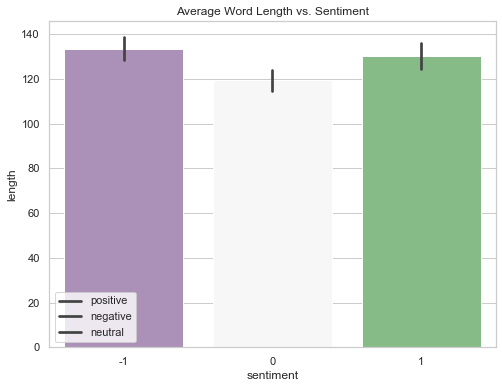

In [154]:
train_tweets['length'] = train_tweets['tweet_text'].apply(len)
myLabels = ["positive", "negative", "neutral"]
sns.set(style="whitegrid")
fig1 = sns.barplot(x='sentiment',y='length', data=train_tweets, palette='PRGn')

plt.title('Average Word Length vs. Sentiment')
fig1.legend(labels=myLabels)
plot = fig1.get_figure()
plot.savefig('Bargraph.png')

In [0]:
# train_tweets['typeofsentiment'] = train_tweets['sentiment'].apply(len)
train_tweets.head()

8.0
6.0


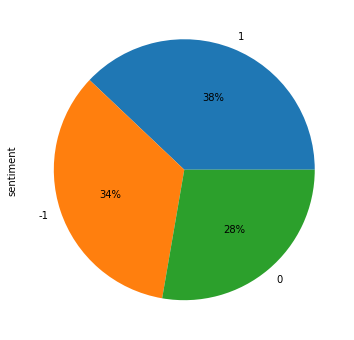

In [100]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

train_tweets['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Model Selection & Machine Learning

In [0]:
X = train_tweets['tweet_text']
print(X)
y = train_tweets['sentiment']

In [0]:
test = test_tweets[['tweet_text']]

## Using Support Vector Machine:
### Training

In [119]:
tw_train, tw_test, label_train, label_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [122]:
pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None
                ))
])

pipe.fit(tw_train, label_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

### Prediction

In [123]:
svm_predictions = pipe.predict(tw_test)
classification_result = classification_report(svm_predictions,label_test)
accuracy = accuracy_score(label_test, svm_predictions)

confusion_matrix(label_test, nb_predictions)

array([[36,  1, 24],
       [ 8, 20, 28],
       [10,  3, 59]])

In [124]:
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.67      0.64      0.66        64
           0       0.61      0.64      0.62        53
           1       0.62      0.62      0.62        72

   micro avg       0.63      0.63      0.63       189
   macro avg       0.63      0.64      0.63       189
weighted avg       0.64      0.63      0.64       189

0.6349206349206349


## Using Naive Bayes classifier:
### Training

In [125]:
print(test_tweets)

tweet_text
0    ['guy', 'enamor', 'trump', 'attempt', 'keep', ...
1    ['RT', 'WayneDupreeShow', 'Trump', 'impeachmen...
2    ['RT', 'washingtonpost', 'Analysis', 'McConnel...
3    ['RT', 'GREAT', 'MARK', 'HONOR', 'FIRST', 'JEW...
4    ['RT', 'Trump', 'fourth', 'president', 'Americ...
..                                                 ...
941  ['RT', 'maddow', 'Orlando', 'Sentinel', 'House...
942  ['RT', 'cnnbrk', 'House', 'panel', 'approve', ...
943  ['RepJeffries', 'Trump', 'win', 'fell', 'usual...
944  ['RT', 'ProfBlacktruth', 'Hey', 'CNN', 'still'...
945  ['RT', 'JoyceWhiteVance', 'think', 'Trump', 'w...

[946 rows x 1 columns]


In [126]:
pipe2 = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB(alpha=1.1))
])

pipe2.fit(tw_train, label_train)

Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.1, class_prior=None, fit_prior=True))])

### Prediction

In [127]:
nb_predictions = pipe2.predict(tw_test)

classification_result = classification_report(nb_predictions,label_test)
accuracy = accuracy_score(label_test, nb_predictions)
confusion_matrix(label_test, nb_predictions)

array([[36,  1, 24],
       [ 8, 20, 28],
       [10,  3, 59]])

In [116]:
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.59      0.67      0.63        54
           0       0.36      0.83      0.50        24
           1       0.82      0.53      0.64       111

   micro avg       0.61      0.61      0.61       189
   macro avg       0.59      0.68      0.59       189
weighted avg       0.70      0.61      0.62       189

0.6084656084656085
